In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [3]:
df_can = pd.read_excel('D:\Kuliah\Kuliah\Semester 5\Hacktiv8\Sesi 8\Canada.xlsx', 
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

print('Data downloaded and read into a dataframe')

Data downloaded and read into a dataframe


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
print(df_can.shape)

(195, 43)


In [6]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [7]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OdName    195 non-null    object
 1   AreaName  195 non-null    object
 2   RegName   195 non-null    object
 3   DevName   195 non-null    object
 4   1980      195 non-null    int64 
 5   1981      195 non-null    int64 
 6   1982      195 non-null    int64 
 7   1983      195 non-null    int64 
 8   1984      195 non-null    int64 
 9   1985      195 non-null    int64 
 10  1986      195 non-null    int64 
 11  1987      195 non-null    int64 
 12  1988      195 non-null    int64 
 13  1989      195 non-null    int64 
 14  1990      195 non-null    int64 
 15  1991      195 non-null    int64 
 16  1992      195 non-null    int64 
 17  1993      195 non-null    int64 
 18  1994      195 non-null    int64 
 19  1995      195 non-null    int64 
 20  1996      195 non-null    int64 
 21  1997      195 no

In [8]:
df_can.rename(columns= {'OdName' : 'Country', 'AreaName' : 'Continent', 'RegName' : 'Region'}, inplace= True)

In [9]:
df_can.set_index('Country', inplace=True)

In [10]:
df_can['Total'] = df_can.loc[:, 1980:2013].sum(axis= 1)

In [11]:
years = list(map(str, range(1980, 2014)))
print('Data dimensions:', df_can.shape)

Data dimensions: (195, 38)


In [15]:
path_alice = r'D:\Kuliah\Kuliah\Semester 5\Hacktiv8\Sesi 8\Novel Alice.txt'

In [16]:
alice_novel = open(path_alice, 'r').read()

In [17]:
stopwords = set(STOPWORDS)

In [18]:
#memilih 2000 kata pertama pada novel
alice_wc = WordCloud(
    background_color='white',
    max_words= 2000,
    stopwords= stopwords
)
alice_wc.generate(alice_novel)

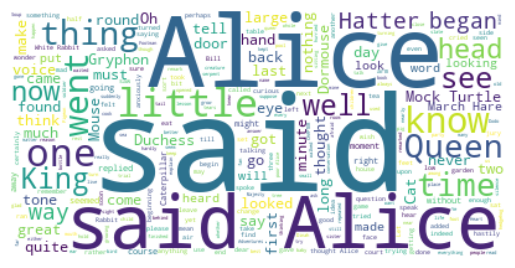

In [19]:
#menampilkan word cloud yang telah dibuat 
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

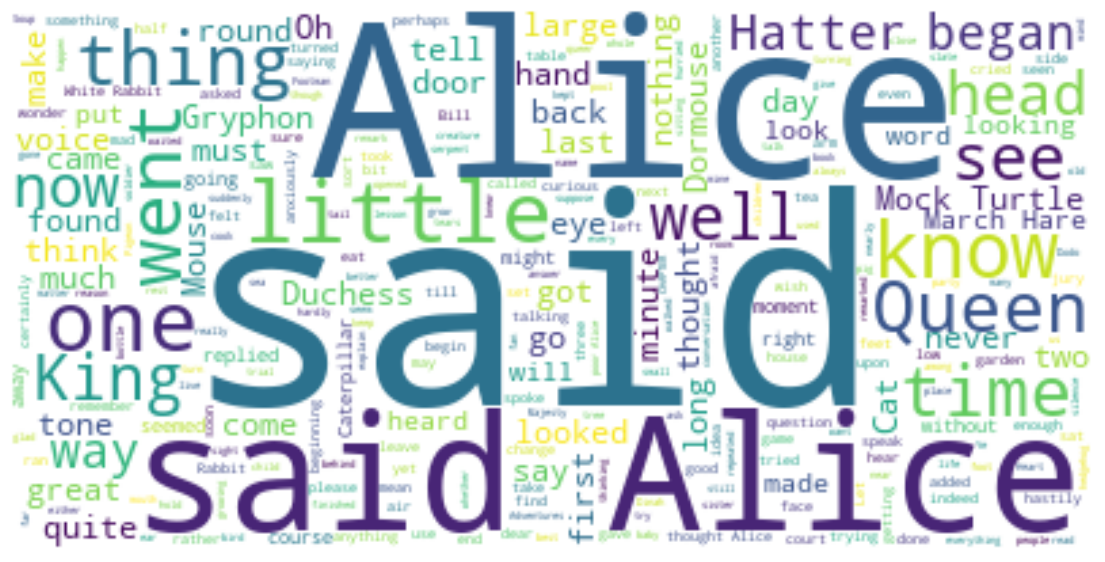

In [20]:
#mengubah ukuran cloud agar lebih terlihat
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
#agar gambarnya lebih jelas
alice_wc = WordCloud(
    background_color='white',
    max_words= 2000,
    stopwords= stopwords,
    width = 1350,
    height = 1050
)
alice_wc.generate(alice_novel)

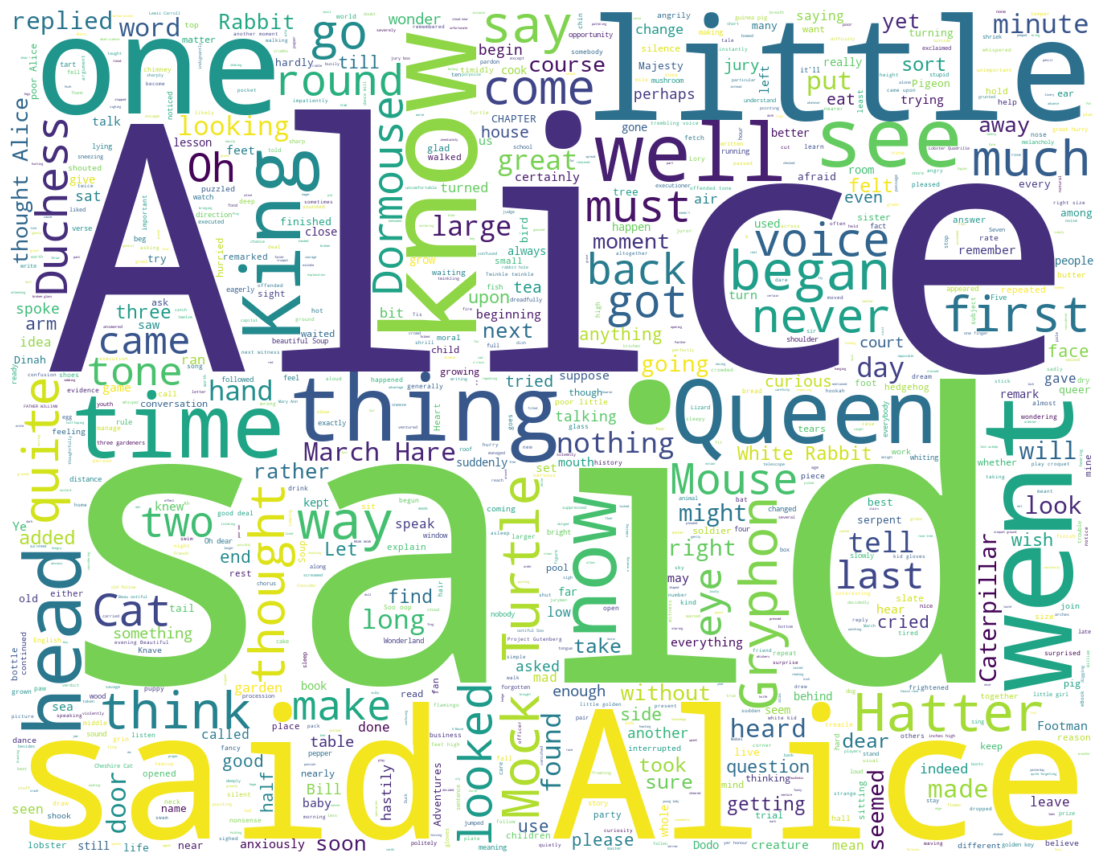

In [25]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
alice_mask = np.array(Image.open('alice_mask.png'))
print('Image downloaded and saved')

Image downloaded and saved


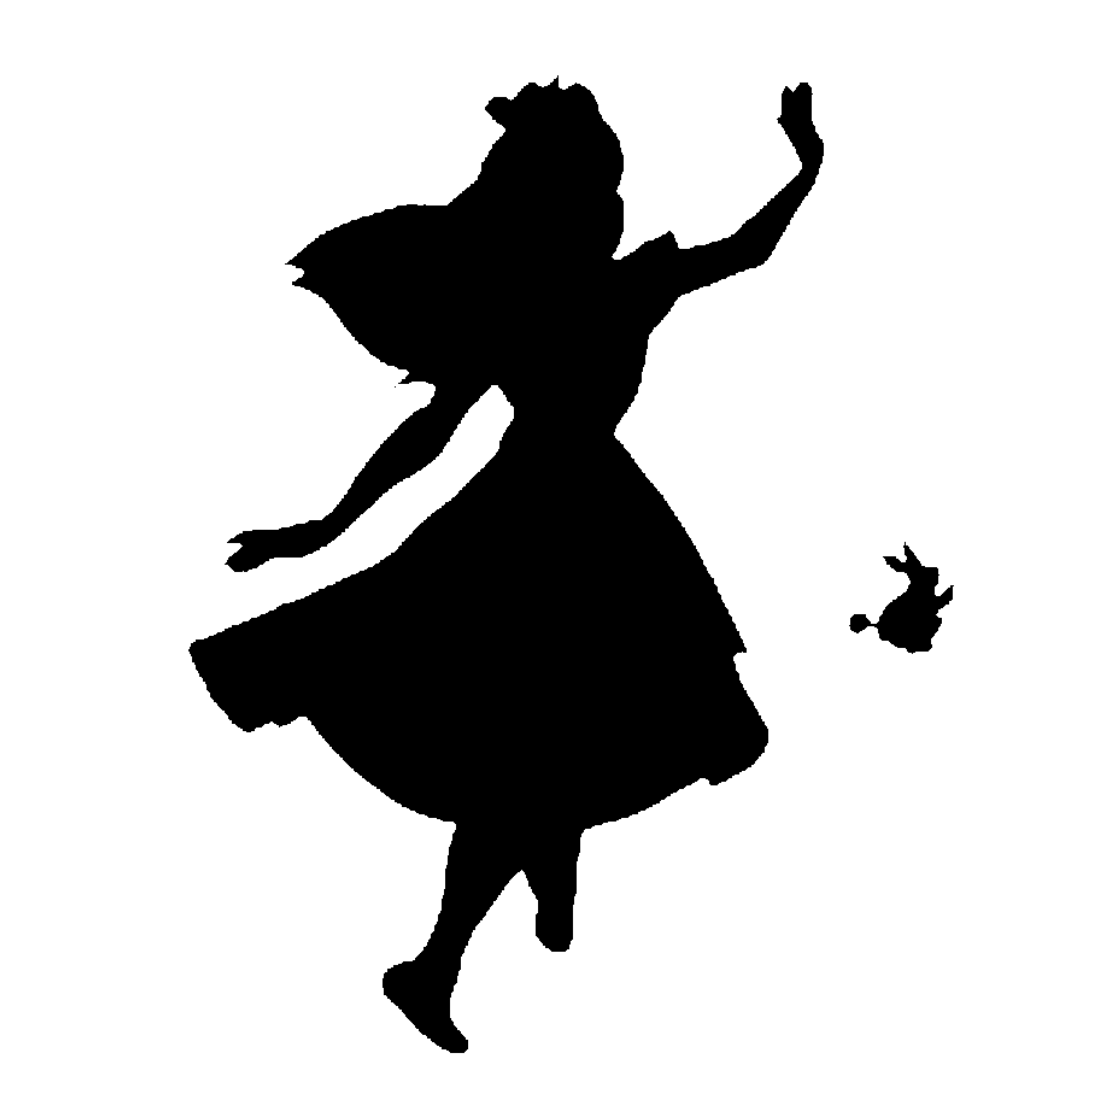

In [27]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

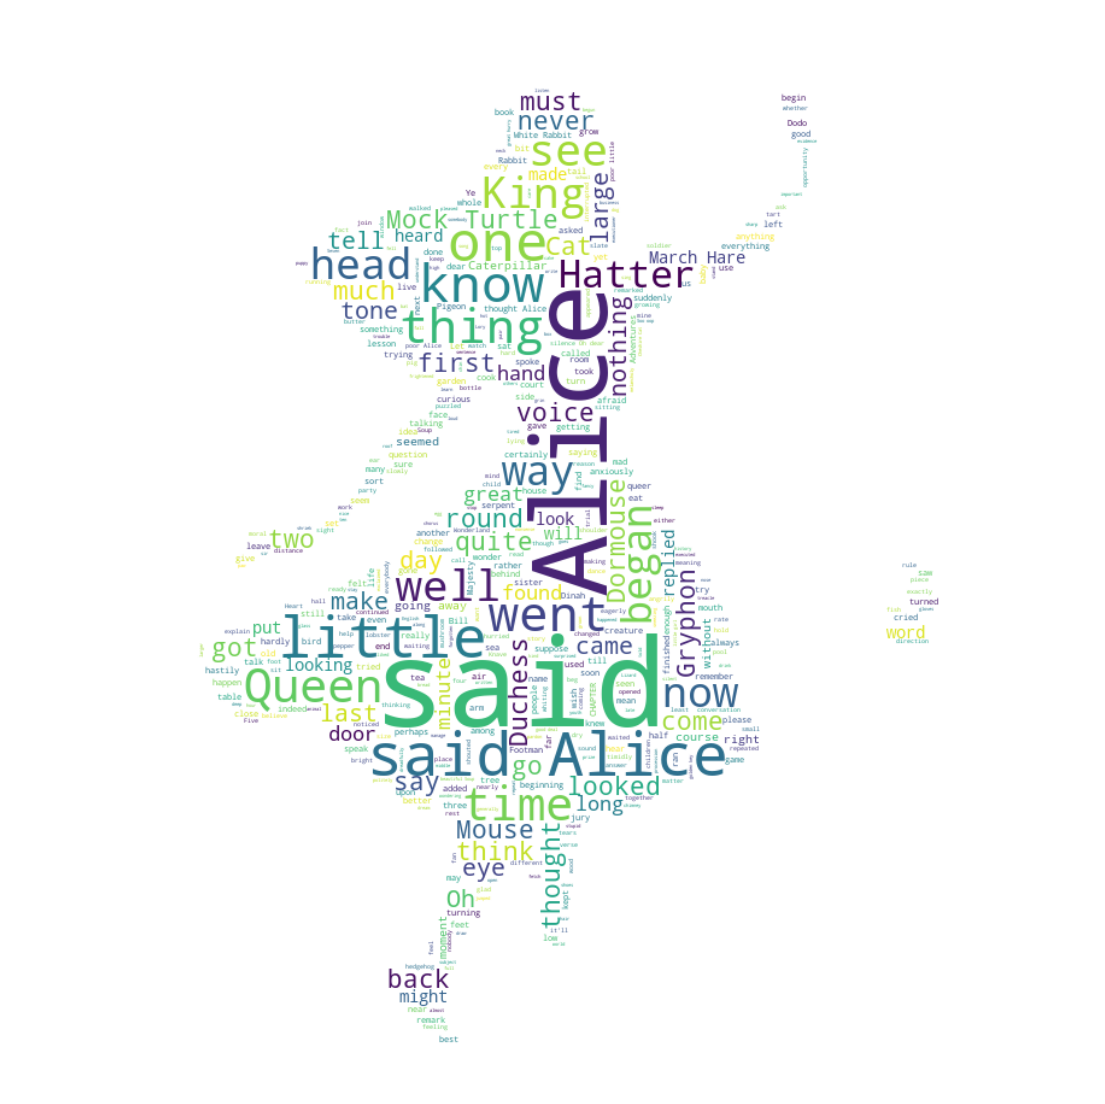

In [28]:
alice_wc = WordCloud(
    background_color='white',
    max_words= 2000,
    mask=alice_mask,
    stopwords= stopwords
)
alice_wc.generate(alice_novel)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [30]:
total_imigration = df_can['Total'].sum()
total_imigration

6409153

In [31]:
max_word = 90
word_string = ''
for country in df_can.index.values :
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_imigration)*max_word)
        word_string = word_string + ((country + ' ') * repeat_num_times)
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [32]:
wordcloud = WordCloud(background_color='white').generate(word_string)
print('Word cloud created!')

Word cloud created!


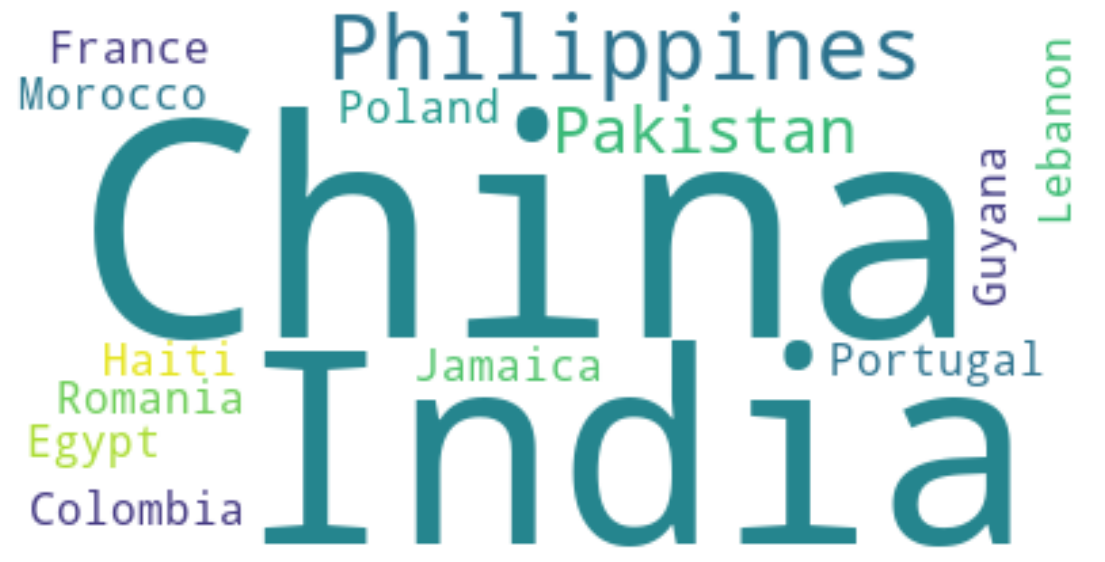

In [33]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
import seaborn as sns
print ('seaborn installed and imported!')

seaborn installed and imported!


In [36]:
df_tot = pd.DataFrame(df_can.loc[:, 1980:2013].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['years', 'total']
df_tot.head()

,years,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


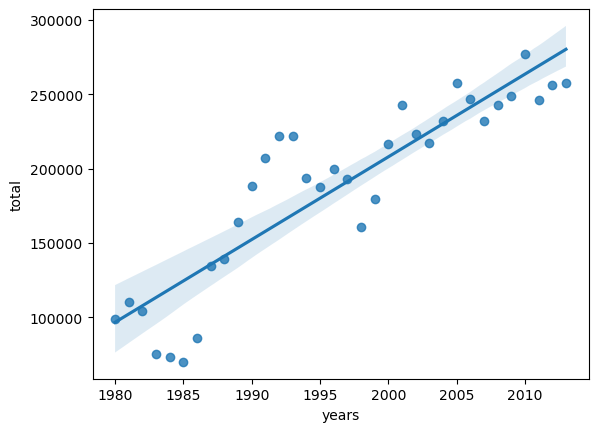

In [37]:
ax = sns.regplot(x='years', y='total', data=df_tot)

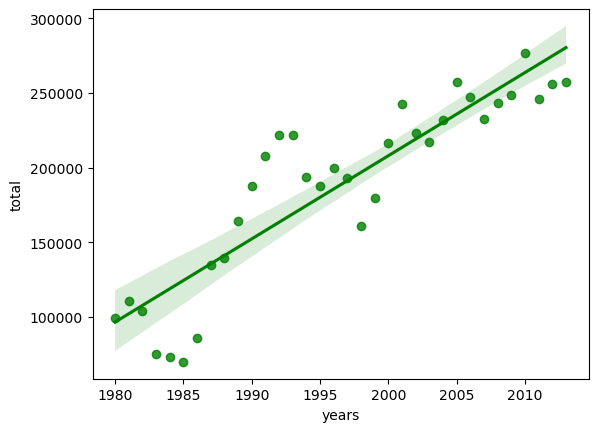

In [38]:
ax = sns.regplot(x='years', y ='total', data=df_tot, color='green')

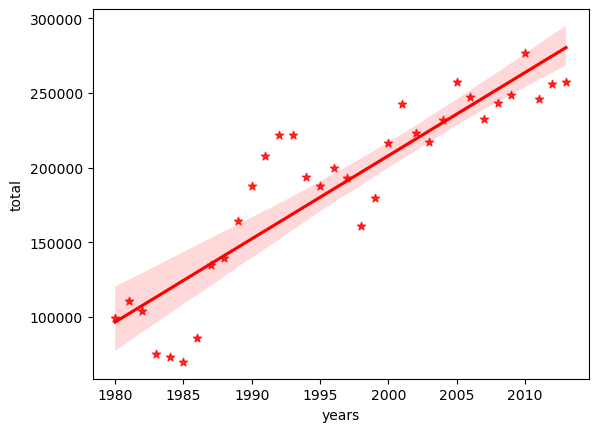

In [39]:
ax = sns.regplot(x='years', y='total', data=df_tot, color='red', marker='*')

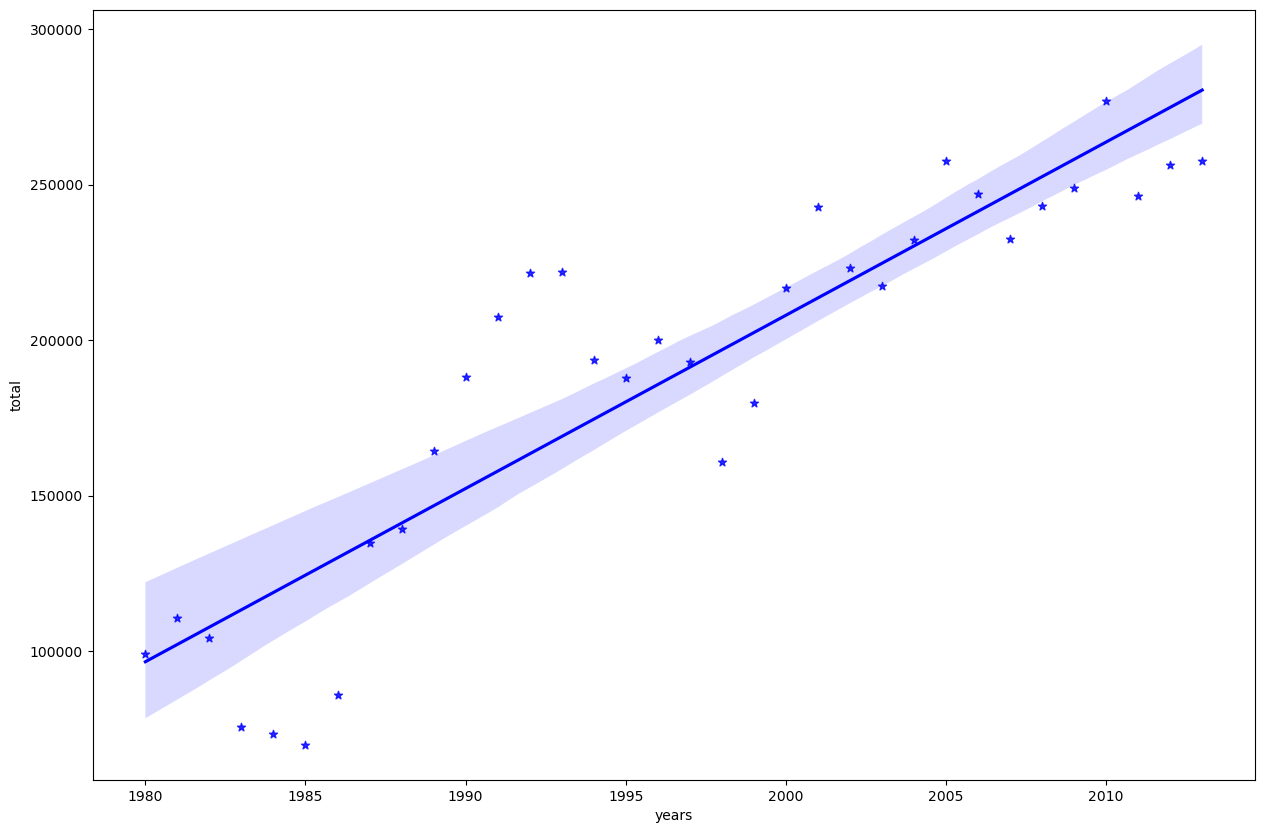

In [40]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='years', y='total', data=df_tot, color='blue', marker='*')

Text(0.5, 1.0, 'Total immigration to canada from 1980 - 2013')

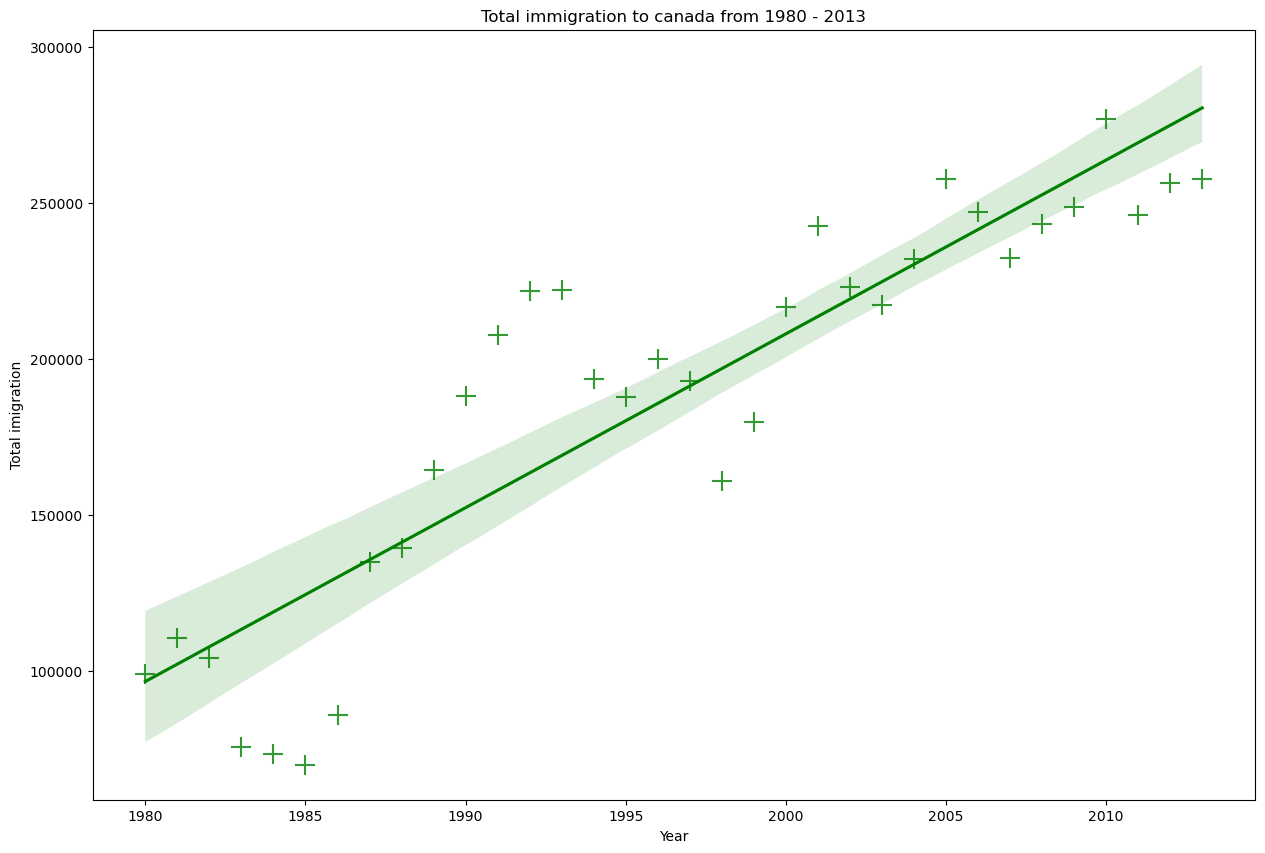

In [41]:
#meningkatkan ukuran marker
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='years', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel= 'Year', ylabel='Total imigration')
ax.set_title('Total immigration to canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to canada from 1980 - 2013')

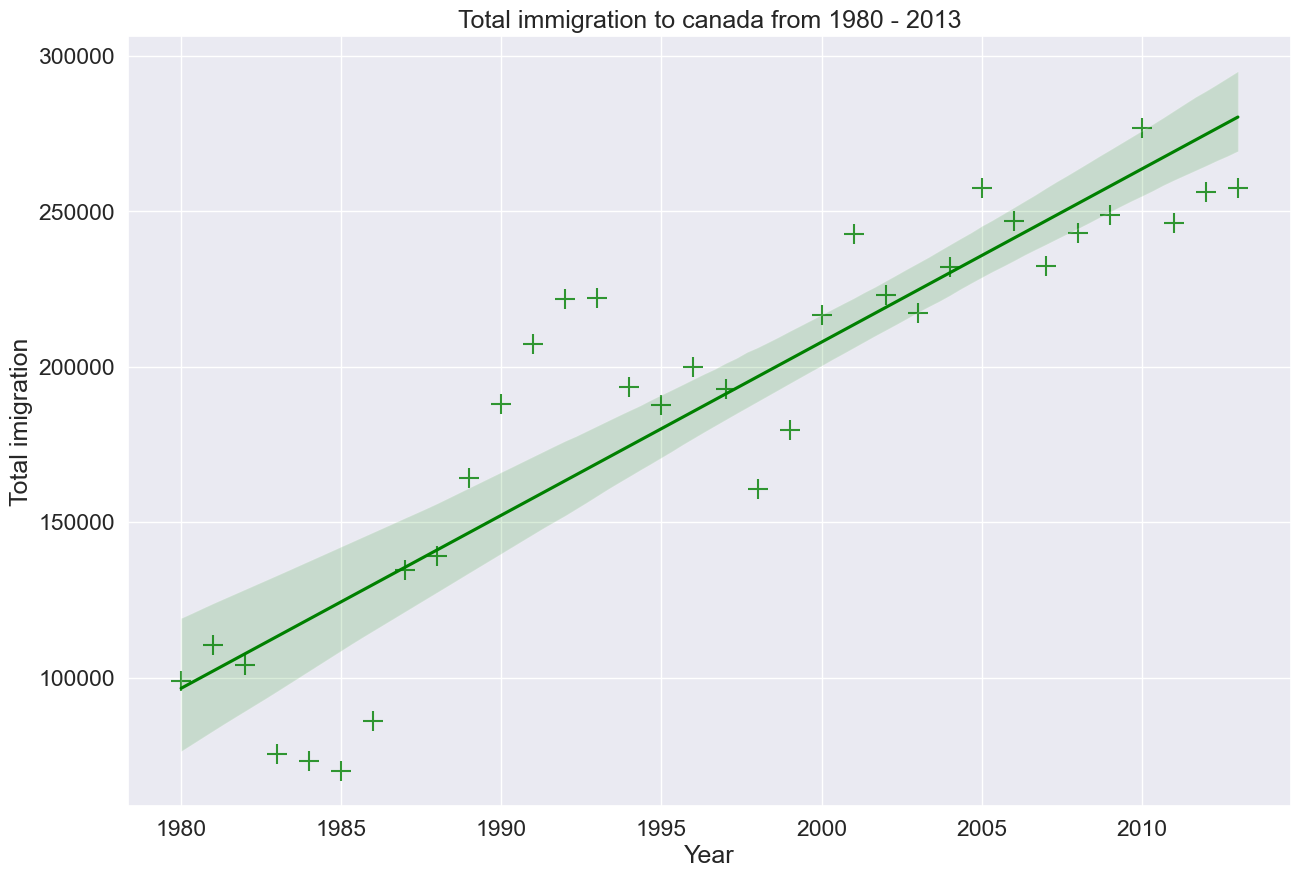

In [42]:
#meningkatkan ukuran font pada label 
#meningkatkan ukuran marker
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
ax = sns.regplot(x='years', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel= 'Year', ylabel='Total imigration')
ax.set_title('Total immigration to canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to canada from 1980 - 2013')

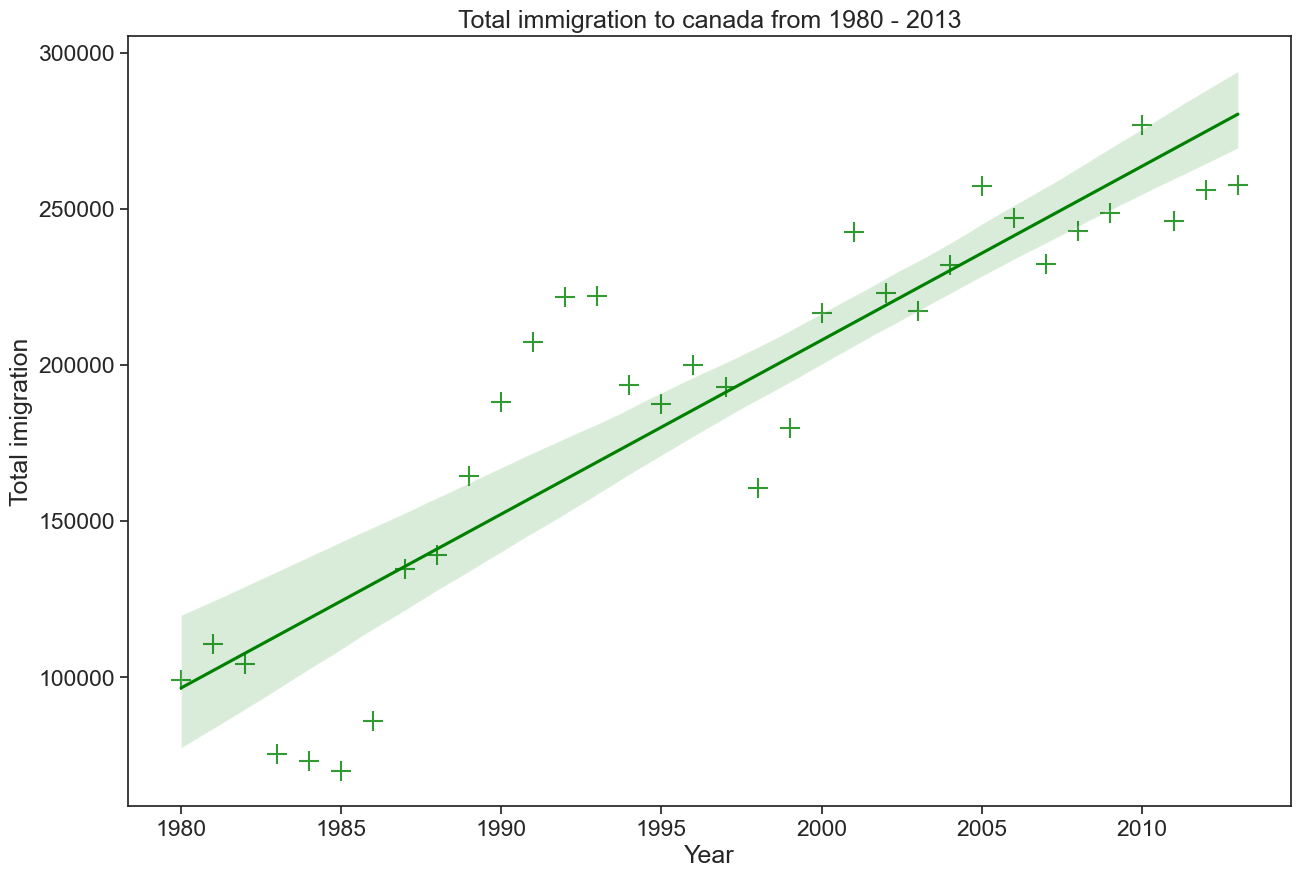

In [43]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
#mengubah bakcground
sns.set_style('ticks')
ax = sns.regplot(x='years', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel= 'Year', ylabel='Total imigration')
ax.set_title('Total immigration to canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to canada from 1980 - 2013')

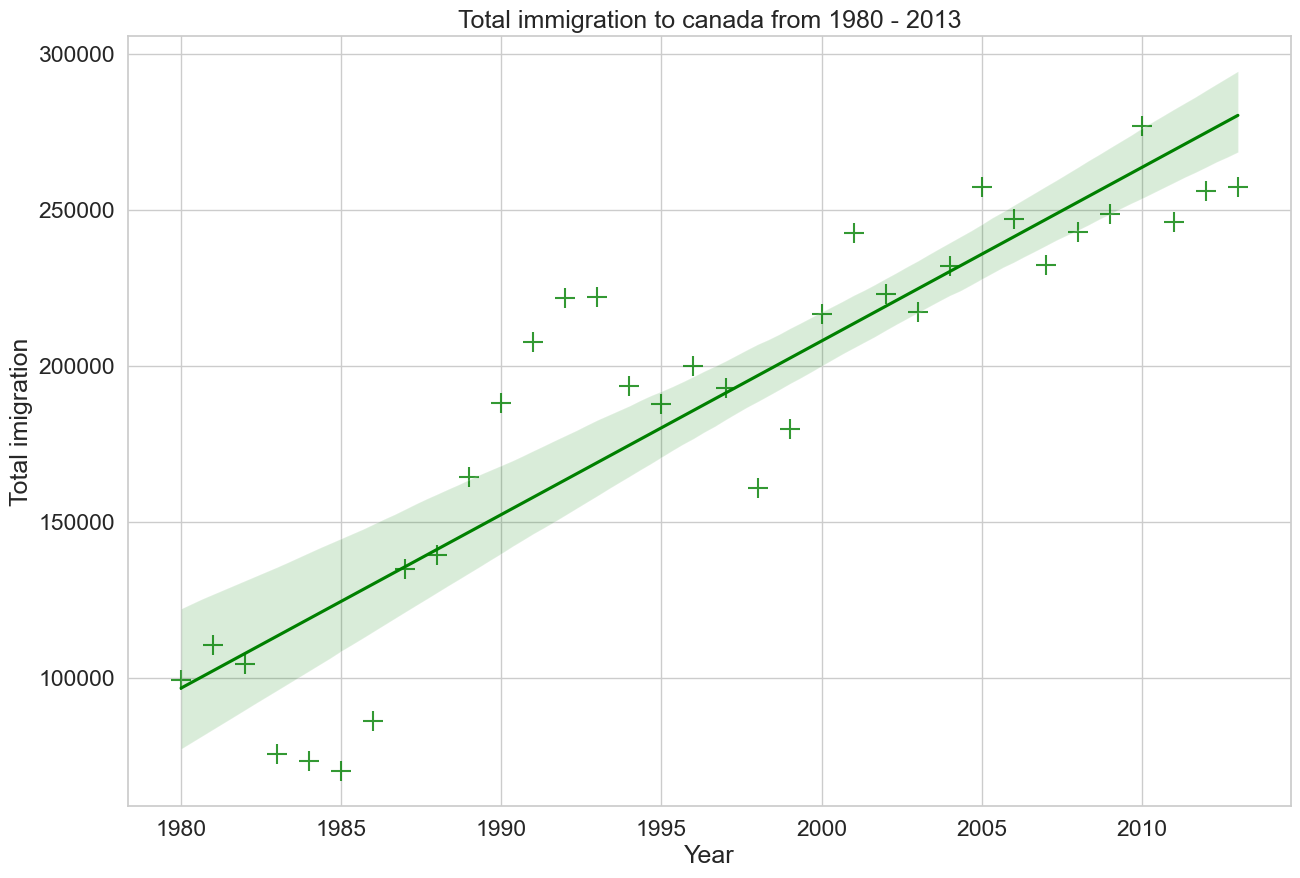

In [44]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
#mengubah bakcground
sns.set_style('whitegrid')
ax = sns.regplot(x='years', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel= 'Year', ylabel='Total imigration')
ax.set_title('Total immigration to canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration from Denmark, Sweden, and Norway to canada from 1980 - 2013')

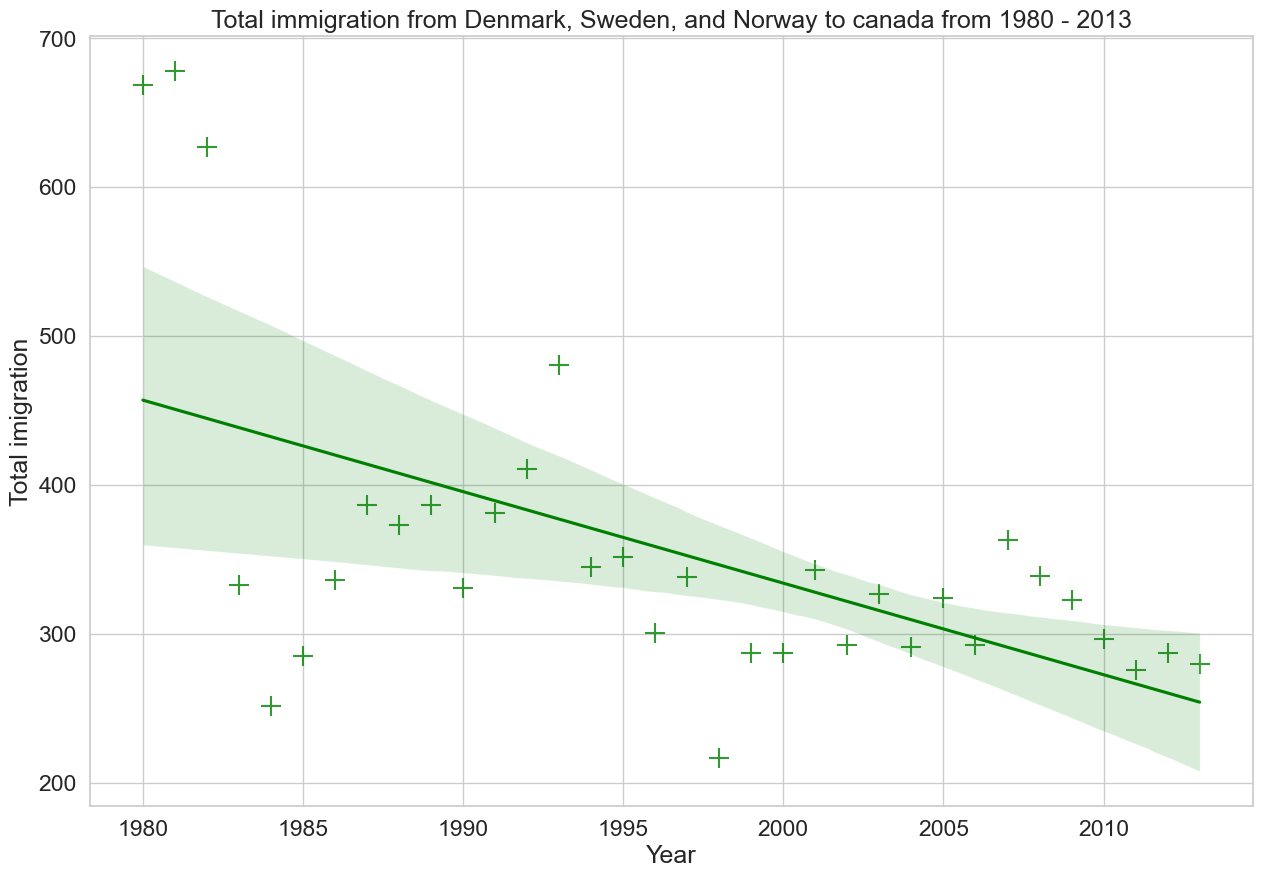

In [45]:
# membuat dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'],
1980:2013].transpose()

# membuat total dengan sum
df_total = pd.DataFrame(df_countries.sum(axis=1))

#reset index in place
df_total.reset_index(inplace=True)
#rename columns
df_total.columns = ['year', 'total']
#change column year from string to int
df_total['year'] = df_total['year'].astype(int)


plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
#mengubah bakcground
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel= 'Year', ylabel='Total imigration')
ax.set_title('Total immigration from Denmark, Sweden, and Norway to canada from 1980 - 2013')
